In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, TunedThresholdClassifierCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score, roc_auc_score, precision_recall_curve, precision_recall_fscore_support
import seaborn as sns
import matplotlib as plt
import itertools

In [4]:
constructedData = pd.read_csv('../MAIN/Combining Data/combined_data.csv')

## Decision Tree for Run vs Pass

In [3]:
categoricalFeatures = ['pff_passCoverage', 'pff_manZone']
decisionTreeData = pd.get_dummies(constructedData, columns=categoricalFeatures)

In [4]:
indicator = decisionTreeData['isDropback']
print(indicator.value_counts())

isDropback
True     9736
False    6388
Name: count, dtype: int64


0.5752377015295577


[Text(0.5, 0.875, 'x[3] <= 2.5\nentropy = 1.0\nsamples = 11286\nvalue = [5643.0, 5643.0]'),
 Text(0.25, 0.625, 'x[4] <= 10.5\nentropy = 0.991\nsamples = 8752\nvalue = [4984.333, 3979.261]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[12] <= 0.5\nentropy = 0.983\nsamples = 7999\nvalue = [4765.2, 3500.13]'),
 Text(0.0625, 0.125, 'entropy = 0.996\nsamples = 5269\nvalue = [2870.267, 2480.739]'),
 Text(0.1875, 0.125, 'entropy = 0.934\nsamples = 2730\nvalue = [1894.933, 1019.391]'),
 Text(0.375, 0.375, 'x[2] <= 3.5\nentropy = 0.898\nsamples = 753\nvalue = [219.133, 479.13]'),
 Text(0.3125, 0.125, 'entropy = 0.835\nsamples = 540\nvalue = [130.467, 361.0]'),
 Text(0.4375, 0.125, 'entropy = 0.985\nsamples = 213\nvalue = [88.667, 118.13]'),
 Text(0.75, 0.625, 'x[4] <= 1.5\nentropy = 0.86\nsamples = 2534\nvalue = [658.667, 1663.739]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[0] <= 86.16\nentropy = 0.766\nsamples = 389\nvalue = [342.0, 98.304]'),
 Text(0.5625, 0.125, 'entro

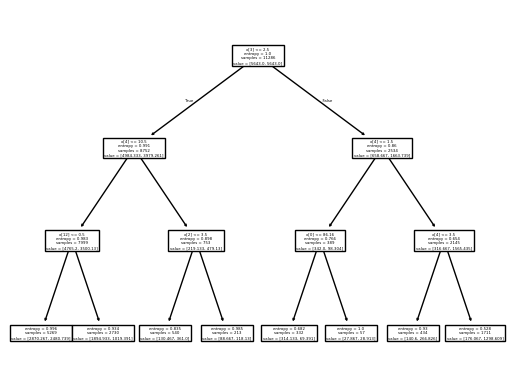

In [5]:
featureHeaders = ['totalDistanceTraveledByPossessionTeam',
                   'absoluteYardlineNumber', 'quarter', 'down', 'yardsToGo', 'pff_passCoverage_2-Man', 'pff_passCoverage_Bracket',
       'pff_passCoverage_Cover 6-Left', 'pff_passCoverage_Cover-0',
       'pff_passCoverage_Cover-1', 'pff_passCoverage_Cover-1 Double',
       'pff_passCoverage_Cover-2', 'pff_passCoverage_Cover-3',
       'pff_passCoverage_Cover-3 Cloud Left',
       'pff_passCoverage_Cover-3 Cloud Right',
       'pff_passCoverage_Cover-3 Double Cloud',
       'pff_passCoverage_Cover-3 Seam', 'pff_passCoverage_Cover-6 Right',
       'pff_passCoverage_Goal Line', 'pff_passCoverage_Miscellaneous',
       'pff_passCoverage_Prevent', 'pff_passCoverage_Quarters',
       'pff_passCoverage_Red Zone', 'pff_manZone_Man', 'pff_manZone_Other',
       'pff_manZone_Zone']
X = decisionTreeData[featureHeaders]
y = decisionTreeData['isDropback']
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.3, random_state=42)
clfObj = DecisionTreeClassifier(max_depth=3, class_weight='balanced', criterion='entropy')
clf = clfObj.fit(XTrain, yTrain)

yPred = clf.predict(XTest)
print(metrics.accuracy_score(yTest, yPred))
tree.plot_tree(clf)

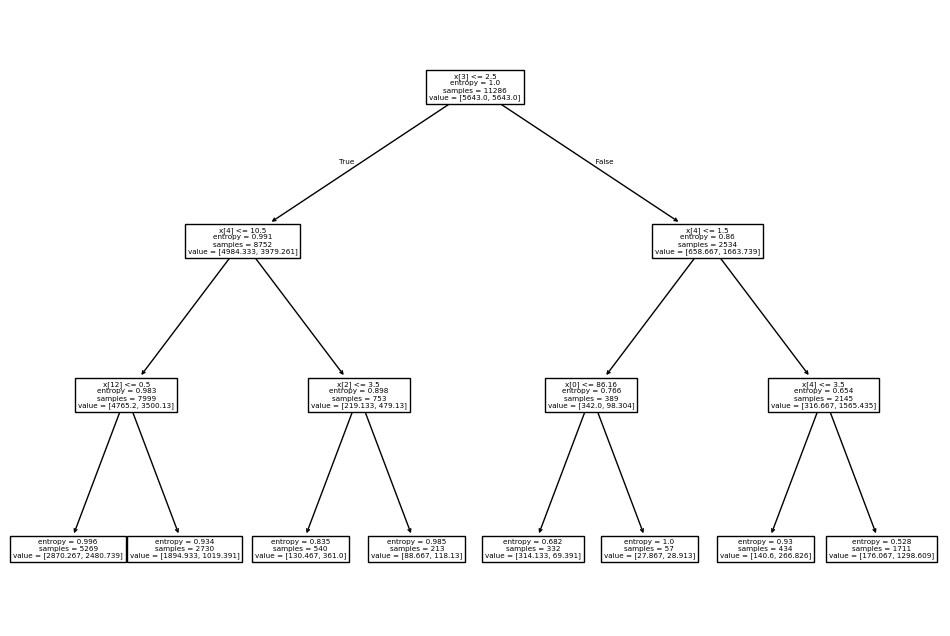

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
tree.plot_tree(clf)
plt.show()

In [7]:
cm = confusion_matrix(yTest, yPred)
print(cm)
tn, fp, fn, tp = confusion_matrix(yTest, yPred).ravel()
print(tn, fp, fn, tp)

classReport = classification_report(yTest, yPred)
print(classReport)

[[1742  191]
 [1864 1041]]
1742 191 1864 1041
              precision    recall  f1-score   support

       False       0.48      0.90      0.63      1933
        True       0.84      0.36      0.50      2905

    accuracy                           0.58      4838
   macro avg       0.66      0.63      0.57      4838
weighted avg       0.70      0.58      0.55      4838



## Linear Regression for PointsAdded

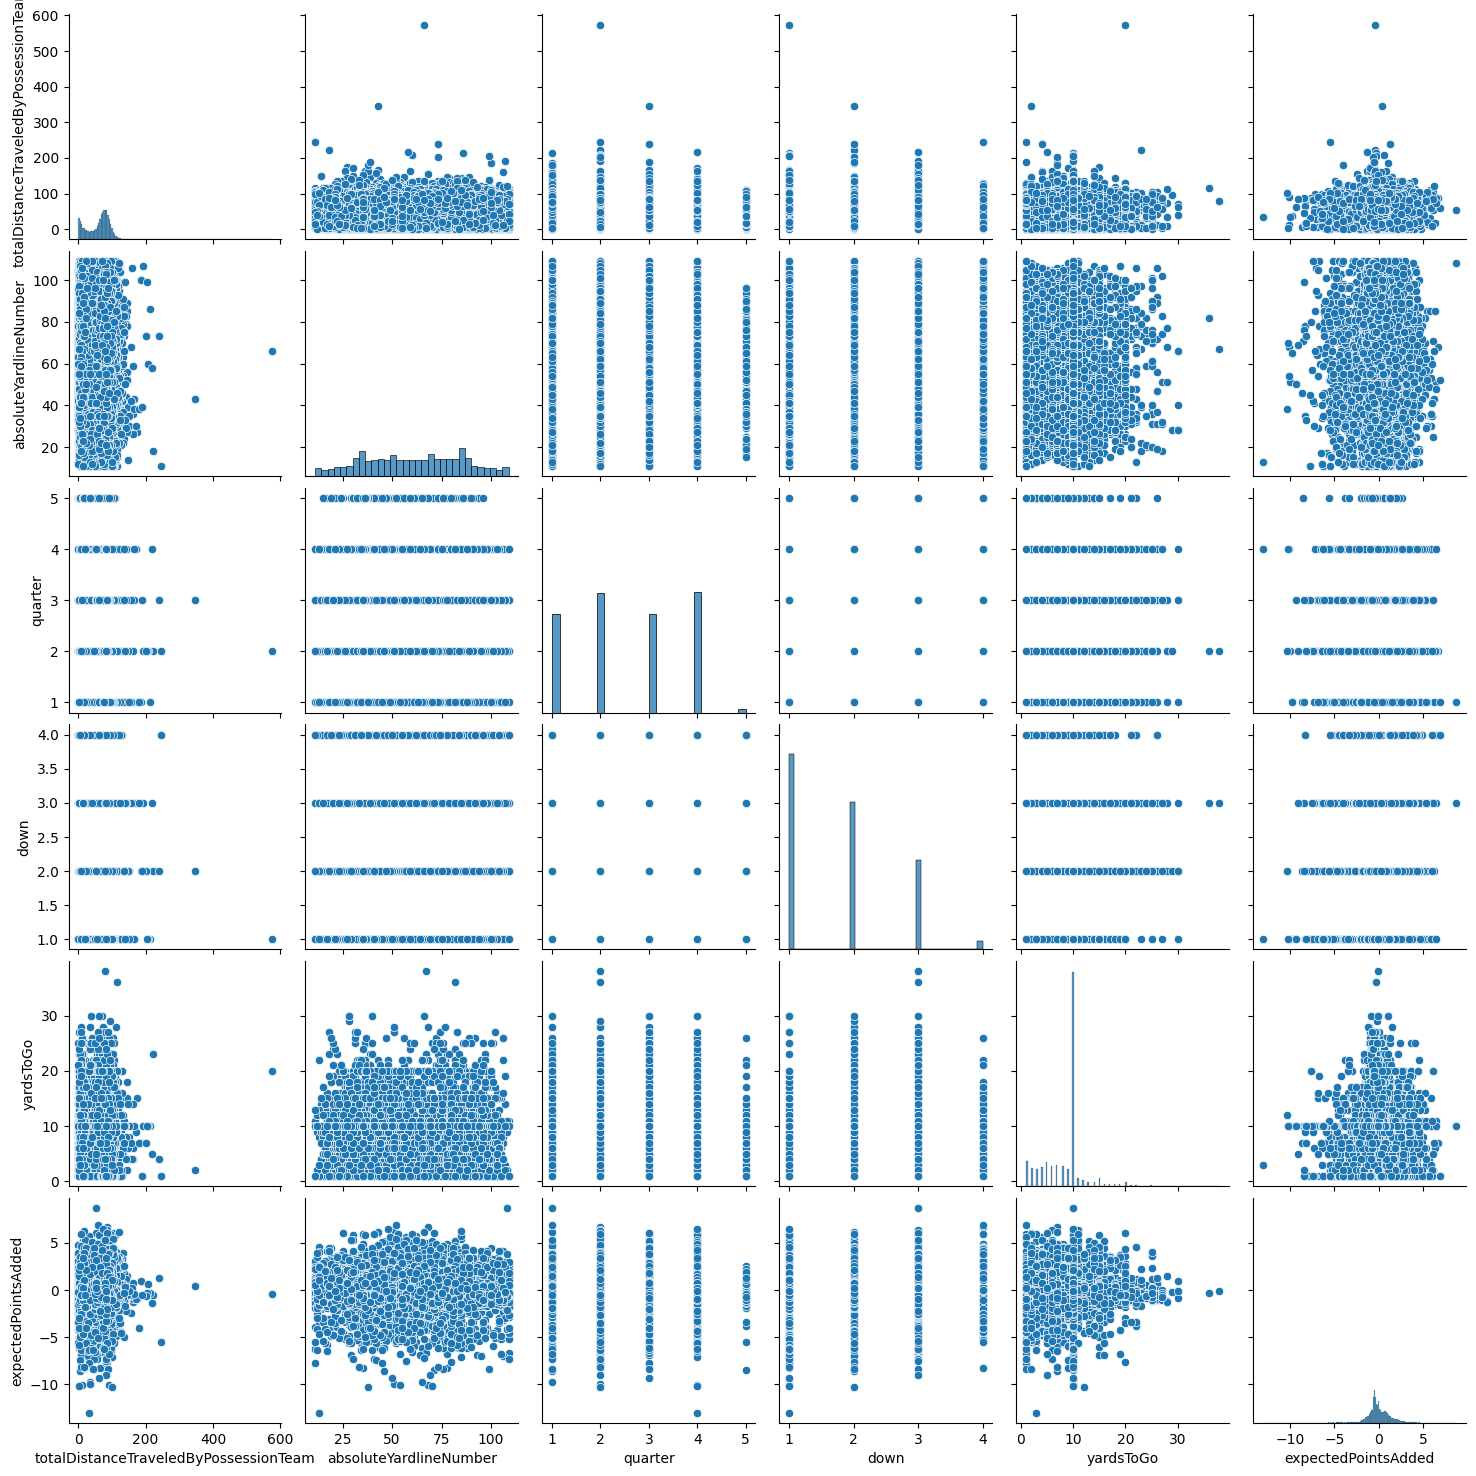

In [8]:
linRegFeatures = ['totalDistanceTraveledByPossessionTeam', 
                  'absoluteYardlineNumber', 
                  'quarter', 'down', 'yardsToGo',
                  'expectedPointsAdded']
linRegData = constructedData[linRegFeatures]
linRegData = linRegData.dropna()
X = linRegData.drop(['expectedPointsAdded'], axis=1)
y = linRegData['expectedPointsAdded']
XTrain_linreg, XTest_linreg, yTrain_linreg, yTest_linreg = train_test_split(X, y)
sns.pairplot(linRegData)
plt.show()

In [9]:
linReg = LinearRegression().fit(XTrain_linreg, yTrain_linreg)
print(linReg.coef_)

[-6.94496676e-04  3.89217045e-05 -1.71305985e-02 -4.49202919e-02
 -1.14941045e-02]


In [10]:
predicted_linreg = linReg.predict(XTest_linreg)
print(mean_squared_error(yTest_linreg, predicted_linreg))
print(r2_score(yTest_linreg, predicted_linreg))

2.0616394597003227
0.0017690617497879702


## Random Forest for Expected Points Added

In [11]:
xpa_Data_Cols = ['totalDistanceTraveledByPossessionTeam', 
                  'absoluteYardlineNumber', 
                  'quarter', 'down', 'yardsToGo',
                  'expectedPointsAdded']

xpa_Data = constructedData[xpa_Data_Cols]
xpa_Data = xpa_Data.dropna()
xpa_Data.loc[xpa_Data['expectedPointsAdded'] < 0, 'expectedPointsAdded'] = 0
xpa_Data.loc[xpa_Data['expectedPointsAdded'] > 0, 'expectedPointsAdded'] = 1
X_xpa = xpa_Data.drop(['expectedPointsAdded'], axis=1)
y_xpa = xpa_Data['expectedPointsAdded']
print(y_xpa.value_counts())
XTrain_xpa, XTest_xpa, yTrain_xpa, yTest_xpa = train_test_split(X_xpa, y_xpa)

expectedPointsAdded
0.0    9266
1.0    6853
Name: count, dtype: int64


In [12]:
xpa_randForest = RandomForestClassifier().fit(XTrain_xpa, yTrain_xpa)
predict_xpa = xpa_randForest.predict(XTest_xpa)
print(classification_report(yTest_xpa, predict_xpa))

              precision    recall  f1-score   support

         0.0       0.60      0.68      0.64      2324
         1.0       0.47      0.38      0.42      1706

    accuracy                           0.55      4030
   macro avg       0.53      0.53      0.53      4030
weighted avg       0.54      0.55      0.55      4030



## Classification on Position Movement vs Run/Pass

In [6]:
cols_logReg = [colHeader for colHeader in list(constructedData.columns) if (colHeader.startswith('distance') and (colHeader not in ['distance_OLB', 'distance_DT', 'distance_ILB', 'distance_FS']))] + ['isDropback']
data_logReg = constructedData[cols_logReg].dropna()
X = data_logReg.drop(['isDropback'], axis=1)
y = data_logReg['isDropback']
XTrain_clf, XTest_clf, yTrain_clf, yTest_clf = train_test_split(X, y)

(16119, 9)
(16119, 9)


### Logistic Regression

In [ ]:
pipeline_logReg = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(class_weight='balanced'))
])

pipeline_logReg.fit(XTrain_clf, yTrain_clf)
predicted_logReg = pipeline_logReg.predict(XTest_clf)
y_probs = pipeline_logReg.predict_proba(XTest_clf)[:, 1]
print(roc_auc_score(yTest_clf, y_probs))
print(classification_report(yTest_clf, predicted_logReg))
print(confusion_matrix(yTest_clf, predicted_logReg))

0.6582838993904001
              precision    recall  f1-score   support

       False       0.51      0.64      0.57      1620
        True       0.71      0.58      0.64      2410

    accuracy                           0.61      4030
   macro avg       0.61      0.61      0.60      4030
weighted avg       0.63      0.61      0.61      4030

[[1039  581]
 [1001 1409]]


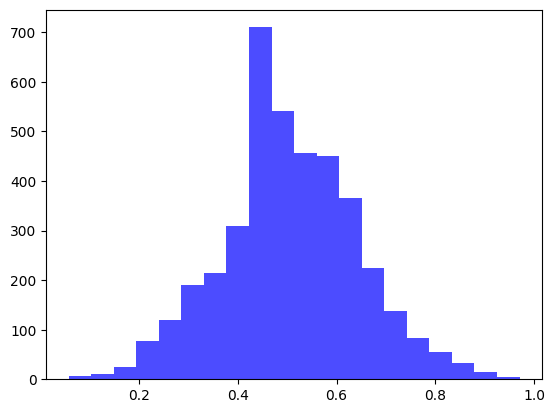

In [15]:
plt.hist(y_probs, bins=20, color='blue', alpha=0.7)
plt.show()

In [ ]:
tunedThresholdCV = TunedThresholdClassifierCV(pipeline_logReg, scoring='f1_weighted').fit(XTrain_clf, yTrain_clf)
tuned_y_probs = tunedThresholdCV.predict_proba(XTest_clf)[:, 1]
print(classification_report(yTest_clf, tunedThresholdCV.predict(XTest_clf)))
print(tunedThresholdCV.best_threshold_)


              precision    recall  f1-score   support

       False       0.58      0.42      0.49      1620
        True       0.67      0.79      0.73      2410

    accuracy                           0.64      4030
   macro avg       0.63      0.61      0.61      4030
weighted avg       0.63      0.64      0.63      4030

0.445031088653121


### Random Forest

Training:
Accuracy: 0.8525932666060054
              precision    recall  f1-score   support

       False       0.79      0.85      0.82      4790
        True       0.90      0.85      0.87      7299

    accuracy                           0.85     12089
   macro avg       0.84      0.85      0.85     12089
weighted avg       0.86      0.85      0.85     12089



AttributeError: module 'matplotlib' has no attribute 'title'

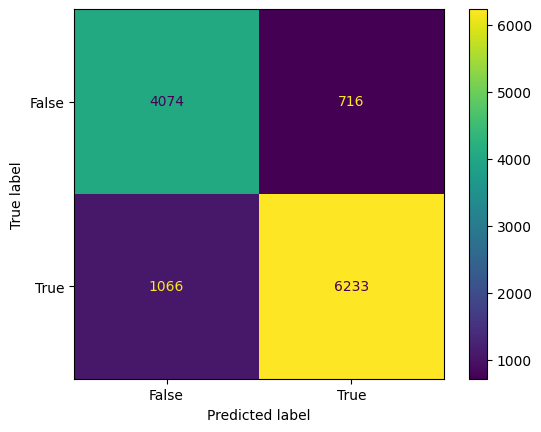

In [7]:
pipeline_randomForest= Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(class_weight='balanced', max_depth=12))
])
pipeline_randomForest.fit(XTrain_clf, yTrain_clf)

print('Training:')
predicted_training_randomForest = pipeline_randomForest.predict(XTrain_clf)
print(f'Accuracy: {metrics.accuracy_score(yTrain_clf, predicted_training_randomForest)}')
print(classification_report(yTrain_clf, predicted_training_randomForest))
metrics.ConfusionMatrixDisplay.from_predictions(yTrain_clf, predicted_training_randomForest)
plt.title(f'Training Set (n={XTrain_clf.shape[0]}) Confusion Matrix for Random Forest')
plt.show()

print('-----------------')

print('Test')
predicted_test_randomForest = pipeline_randomForest.predict(XTest_clf)
y_probs_rf = pipeline_randomForest.predict_proba(XTest_clf)[:, 1]
print(f'Accuracy: {metrics.accuracy_score(yTest_clf, predicted_test_randomForest)}')
print(classification_report(yTest_clf, predicted_test_randomForest))
metrics.ConfusionMatrixDisplay.from_predictions(yTest_clf, predicted_test_randomForest)
plt.title(f'Test Set (n={XTest_clf.shape[0]}) Confusion Matrix for Random Forest')
plt.show()

In [122]:
for scoring in ['accuracy', 'balanced_accuracy', 'average_precision', 'f1_weighted', 'f1']:
    print(scoring)
    tunedThresholdCV_rf = TunedThresholdClassifierCV(pipeline_randomForest, scoring=scoring).fit(XTrain_clf, yTrain_clf)
    print(metrics.accuracy_score(yTest_clf, tunedThresholdCV_rf.predict(XTest_clf)))
    print(classification_report(yTest_clf, tunedThresholdCV_rf.predict(XTest_clf)))
    print(confusion_matrix(yTest_clf, tunedThresholdCV_rf.predict(XTest_clf)))
    print(tunedThresholdCV_rf.best_threshold_)
    print('-----------------------------------------------------------------')

accuracy
0.6803970223325062
              precision    recall  f1-score   support

       False       0.64      0.44      0.52      1594
        True       0.70      0.84      0.76      2436

    accuracy                           0.68      4030
   macro avg       0.67      0.64      0.64      4030
weighted avg       0.67      0.68      0.67      4030

[[ 702  892]
 [ 396 2040]]
0.49407474569721177
-----------------------------------------------------------------
balanced_accuracy
0.68287841191067
              precision    recall  f1-score   support

       False       0.60      0.60      0.60      1594
        True       0.74      0.74      0.74      2436

    accuracy                           0.68      4030
   macro avg       0.67      0.67      0.67      4030
weighted avg       0.68      0.68      0.68      4030

[[ 953  641]
 [ 637 1799]]
0.5770641693644243
-----------------------------------------------------------------
average_precision
0.6625310173697271
              precisi

In [106]:
f1_weighted_tunedThresholdCV_rf = TunedThresholdClassifierCV(pipeline_randomForest, scoring='f1_weighted').fit(XTrain_clf, yTrain_clf)

Training:
Accuracy: 0.8540822235089751
              precision    recall  f1-score   support

       False       0.81      0.83      0.82      4794
        True       0.89      0.87      0.88      7295

    accuracy                           0.85     12089
   macro avg       0.85      0.85      0.85     12089
weighted avg       0.86      0.85      0.85     12089



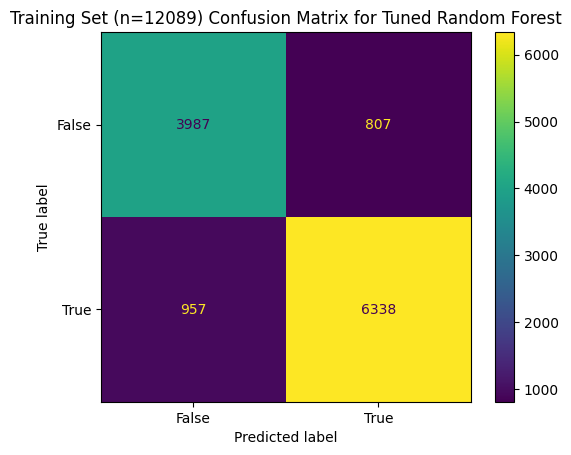

-----------------
Test
Accuracy: 0.6803970223325062
              precision    recall  f1-score   support

       False       0.60      0.57      0.59      1594
        True       0.73      0.75      0.74      2436

    accuracy                           0.68      4030
   macro avg       0.66      0.66      0.66      4030
weighted avg       0.68      0.68      0.68      4030



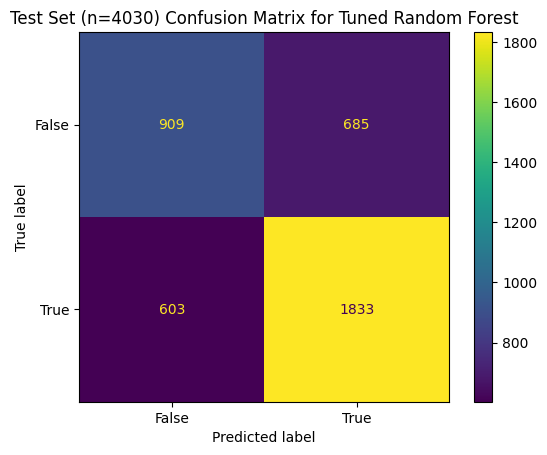

In [108]:
predicted_training_f1_weighted_randomForest = f1_weighted_tunedThresholdCV_rf.predict(XTrain_clf)
print(f'Accuracy: {metrics.accuracy_score(yTrain_clf, predicted_training_f1_weighted_randomForest)}')
print(classification_report(yTrain_clf, predicted_training_f1_weighted_randomForest))
metrics.ConfusionMatrixDisplay.from_predictions(yTrain_clf, predicted_training_f1_weighted_randomForest)
plt.title(f'Training Set (n={XTrain_clf.shape[0]}) Confusion Matrix for Tuned Random Forest')
plt.show()

print('-----------------')

print('Test')
predicted_test_f1_weighted_randomForest = f1_weighted_tunedThresholdCV_rf.predict(XTest_clf)
print(f'Accuracy: {metrics.accuracy_score(yTest_clf, predicted_test_f1_weighted_randomForest)}')
print(classification_report(yTest_clf, predicted_test_f1_weighted_randomForest))
metrics.ConfusionMatrixDisplay.from_predictions(yTest_clf, predicted_test_f1_weighted_randomForest)
plt.title(f'Test Set (n={XTest_clf.shape[0]}) Confusion Matrix for Tuned Random Forest')
plt.show()